Why there are missing values?
Dataset will be collected from multiple sources.
Men hide salary data.
Women hide their age.

Data that will be missing:
1) Continuous data
2) Categorical data

# What are the different types of missing data. 
1. Missing completely at random(MCAR):
A variable is missing completely at random(MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the missing data and any other values.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isnull().sum() #age,deck,embark_town has missing values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#age,deck has more missing values and has no relationship
#embark_town is MCAR
#data collected after accident happended(titanic) some people died and we dont know age and deck
df[df['embark_town'].isnull()]



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


# Missing data not at random(MNAR) : Systematic missing values
There is some relationship between the data missing and any other values within the dataset.


In [8]:
df['deck_null']=np.where(df['deck'].isnull(),1,0) #replace nan with 1

#find the % of null values
df['deck_null'].mean()

0.7721661054994389

In [9]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'deck_null'],
      dtype='object')

In [10]:
df.groupby(['survived'])['deck_null'].mean()

survived
0    0.877960
1    0.602339
Name: deck_null, dtype: float64

# Missing at random(MAR)
Men -- hide salary
Women -- hide age

##All techniques of handling missing values

1. Mean/Median/Mode Replacement
2. Random Sample Imputation
3. Capturing NaN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# Mean / Median / Mode Imputation
When should we apply?

This method has the assumption that the data are missing completely at random(MCAR)

Replacing the NaN with the most frequent occurance of the variables.

In [12]:
df=pd.read_csv('titanic.csv',usecols=['age','survived','fare'])

In [13]:
df

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [15]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [16]:
def impute_nan(df,featurename,median):
  df[featurename+'_median'] = df[featurename].fillna(median)

In [17]:
median = df['age'].median()
median

28.0

In [18]:
impute_nan(df,'age',median)

In [19]:
df.head()

,survived,age,fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [22]:
df.isnull().sum()

survived        0
age           177
fare            0
age_median      0
dtype: int64

In [23]:
df['age'].std()

14.526497332334044

In [24]:
df['age_median'].std()

13.019696550973194

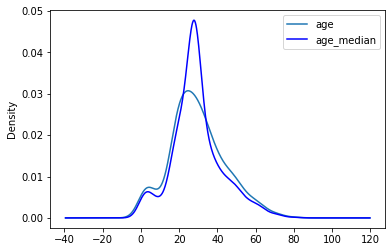

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df['age_median'].plot(kind='kde',ax=ax,color='blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

#Advantages
1. Easy to implement(Robust to outliers).
2. Faster way to obtain the complete dataset

#Disadvantages
1. Change of Distortion in the original variance
2. Impacts of correlation
